### Importing relevant libraries

In [26]:
from sklearn import preprocessing
from matplotlib import pyplot as plt
import matplotlib
import numpy as np

### Loading the data

In [2]:
path = 'A_Z Handwritten Data.csv'

raw_data = np.loadtxt(path, delimiter=',')

### Balancing the dataset

In [3]:
index_of_right_answers = []
unique_indices = []

number_of_indices = {}

for row in raw_data:
    index_of_right_answers.append(row[0])

    
for index in index_of_right_answers:
    if index not in unique_indices:
        unique_indices.append(index)
        number_of_indices[f'{index}'] = index_of_right_answers.count(index)

In [4]:
min_number_of_indecies = min(number_of_indices.values())

balanced_data = []
balaced_data_indices = []

for row in raw_data:
    index = int(row[0])
    number_of_index_in_blanced_data = int(balaced_data_indices.count(index))
    if min_number_of_indecies > number_of_index_in_blanced_data:
        balanced_data.append(row)
        balaced_data_indices.append(index)
        
balanced_data = np.array(balanced_data)

### Transforming the range of pixels from [0, 255] to [0, 1]

In [5]:
index_of_letter = balanced_data[:, 0]
indices_of_image = balanced_data[:, 1:]

scaled_image = indices_of_image / 255.0

scaled_balanced_data = np.column_stack((index_of_letter, scaled_image))

### Shuffling the balanced, scaled data

In [6]:
shuffled_indices = np.arange(scaled_balanced_data.shape[0])
np.random.shuffle(shuffled_indices)

shuffled_data = scaled_balanced_data[shuffled_indices]

### Splitting the data

In [7]:
samples_count = shuffled_data.shape[0]

train_samples_count = int(0.8*samples_count)
validation_samples_count = int(0.1*samples_count)
test_samples_count = samples_count - train_samples_count - validation_samples_count

train_data = shuffled_data[:train_samples_count]
validation_data = shuffled_data[train_samples_count:train_samples_count+validation_samples_count]
test_data = shuffled_data[train_samples_count+validation_samples_count:]

### Converting letter to the matrix

In [8]:
def matrix(index):
    mat = np.zeros((1, 26))
    mat[0, index] = 1
    return mat[0]
    
def split_inputs_targets(data):
    targets_data = []
    for row in data:
        mat = matrix(int(row[0]))
        targets_data.append(mat)
    
    targets_data = np.array(targets_data)
    inputs_data = data[:, 1:]
    
    return inputs_data , targets_data 

In [9]:
train_inputs_data, train_targets_data = split_inputs_targets(train_data)
validation_inputs_data, validation_targets_data = split_inputs_targets(validation_data)
test_inputs_data, test_targets_data = split_inputs_targets(test_data)

### Experimental part, drawing and comparing

In [43]:
def draw(data, index):
    row_test_data = data[index]
    image_test_data = list(row_test_data)

    image_width = 28
    image_height = 28
    
    image_test_data = np.dot(image_test_data, 255)
    
    image_array = np.array(image_test_data)
    image_array = image_array.reshape((image_height, image_width))

    image = np.uint8(image_array)

    plt.imshow(image, cmap=matplotlib.cm.binary, interpolation='nearest')
    plt.show()

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 0.]


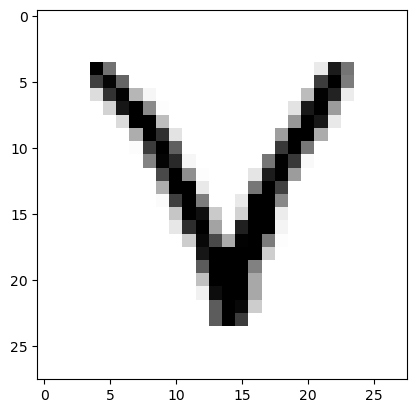

In [61]:
number_of_letter = 5432

print(train_targets_data[number_of_letter])
draw(train_inputs_data, number_of_letter)

### Uploading the data to the *.npz

In [57]:
np.savez('Train_data', inputs=train_inputs_data, targets=train_targets_data)
np.savez('Validation_data', inputs=validation_inputs_data, targets=validation_targets_data)
np.savez('Test_data', inputs=test_inputs_data, targets=test_targets_data)